# Figure Benchmark
Benchmarking ConvexGating against Linear SVM classifier and RBF kernel classifier on three different data sets and annotation levels

In [1]:
import convexgating as cg
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import datetime
import os
import re
from pywget import wget
import json

In [2]:
#convexgating==0.1.1 #branch add_parameter_option

In [2]:
pre = 'B02_benchmark'
start_time = hr.get_time()
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

path exists


In [3]:
def add_ID(df):
    df['ID'] = df['sample'] + '_' + df['cell_type'] + '_' + df['level'].astype(str) 
    return df

def process_hypergate_results_f1(df):
    df_f1 = df[(df['set_size'] == 'full')&(df['score'] == 'f1')]
    return df_f1
def process_hypergate_results_recall(df):
    df_recall = df[(df['set_size'] == 'full')&(df['score'] == 'recall')]
    return df_recall
def process_hypergate_results_precision(df):
    df_precision = df[(df['set_size'] == 'full')&(df['score'] == 'precision')]
    return df_precision

def get_best_hierarchy_string(temp_ID):
    tab = temp_ID[temp_ID.columns[0:5]]
    best_hierarchy = tab.columns[np.argmax(tab.T['f1'])]
    return best_hierarchy

def make_best_hierarchy_df(df):
    unique_IDs = pd.unique(df['ID'])
    out = pd.DataFrame(columns = ['score', 'cell_type', 'sample', 'level', 'ID', 'best_hierarchy'])
    for ID in unique_IDs:
        temp_ID = df[df['ID'] == ID]
        temp_ID.index = temp_ID['score']
        best_hierarchy_ID = get_best_hierarchy_string(temp_ID)
        temp_ID['best_hierarchy'] = temp_ID[best_hierarchy_ID]
        out = out.append(temp_ID[['score', 'cell_type', 'sample', 'level', 'ID','best_hierarchy']])
    return out

In [ ]:
# cyTOF panel

In [4]:
base_path_gating_results = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\supp_Figure_oetjen'

### ConvexGating 

In [5]:
samples = ['A','B','C','H','J','O','T','U'] 
cluster_lvl2 = ['cluster_T cell','cluster_NK cell']
cluster_lvl3 = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cluster_lvl4 = ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']


cluster_lvl5 = ['cluster_CD4+ CM T cell','cluster_CD4+ TEMRA','cluster_CD8+ CM T cell','cluster_CD8+ TE T cell','cluster_Double negative T cell','cluster_NK cell','cluster_Naive CD8+ T cell',
'cluster_CD4+ EM T cell','cluster_CD4+ TRM T cell','cluster_CD8+ EM T cell','cluster_CD8+ TRM T cell','cluster_Double positive T cell','cluster_Naive CD4+ T cell']

gating_dir_lvl2 = os.path.join(base_path_gating_results,'P02_cell_type_lvl2_hull')
oetjen_cg_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        oetjen_cg_lvl2 = oetjen_cg_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl2['level'] = 'lvl2'

gating_dir_lvl3 = os.path.join(base_path_gating_results,'P02_cell_type_lvl3_hull') 
oetjen_cg_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        oetjen_cg_lvl3 = oetjen_cg_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl3['level'] = 'lvl3'

gating_dir_lvl4 = os.path.join(base_path_gating_results,'P02_cell_type_lvl4_hull') 
oetjen_cg_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        oetjen_cg_lvl4 = oetjen_cg_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
oetjen_cg_lvl4['level'] = 'lvl4'

gating_dir_lvl5 = os.path.join(base_path_gating_results,'P02_cell_type_lvl5_hull') 
oetjen_cg_lvl5 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl5:
        perf_loc = os.path.join(gating_dir_lvl5,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        oetjen_cg_lvl5 = oetjen_cg_lvl5.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))

oetjen_cg_lvl2['tool'] = 'ConvexGating'
oetjen_cg_lvl2['level'] = 2

oetjen_cg_lvl3['tool'] = 'ConvexGating'
oetjen_cg_lvl3['level'] = 3

oetjen_cg_lvl4['tool'] = 'ConvexGating'
oetjen_cg_lvl4['level'] = 4

oetjen_cg_lvl5['tool'] = 'ConvexGating'
oetjen_cg_lvl5['level'] = 5

oetjen_cg_lvl2['cell_type'] = oetjen_cg_lvl2['cluster'].str[8:]
oetjen_cg_lvl3['cell_type'] = oetjen_cg_lvl3['cluster'].str[8:]
oetjen_cg_lvl4['cell_type'] = oetjen_cg_lvl4['cluster'].str[8:]
oetjen_cg_lvl5['cell_type'] = oetjen_cg_lvl5['cluster'].str[8:]

oetjen_cg_lvl2 = add_ID(oetjen_cg_lvl2)
oetjen_cg_lvl3 = add_ID(oetjen_cg_lvl3)
oetjen_cg_lvl4 = add_ID(oetjen_cg_lvl4)
oetjen_cg_lvl5 = add_ID(oetjen_cg_lvl5)

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'f1': 'f1_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'f1': 'f1_cg'})

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'recall': 'recall_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'recall': 'recall_cg'})

oetjen_cg_lvl2 = oetjen_cg_lvl2.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl3 = oetjen_cg_lvl3.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl4 = oetjen_cg_lvl4.rename(columns={'precision': 'precision_cg'})
oetjen_cg_lvl5 = oetjen_cg_lvl5.rename(columns={'precision': 'precision_cg'})

## Linear SVM

In [6]:
oetjen_linear_svm_path = os.path.join(path_input_data,'performance_linsvm','svm_linear','Oetjen_data')

In [14]:


oetjen_linear_svm_sub_lv2 = pd.read_csv(os.path.join(oetjen_linear_svm_path,'cytof_data_tmp_cell_type_lvl2_sub_linear_svm_overview.csv'),index_col = 0)
oetjen_linear_svm_sub_lv2 = oetjen_linear_svm_sub_lv2[oetjen_linear_svm_sub_lv2['celltype'] != 'not annotated']


oetjen_linear_svm_sub_lv3 = pd.read_csv(os.path.join(oetjen_linear_svm_path,'cytof_data_tmp_cell_type_lvl3_sub_linear_svm_overview.csv'),index_col = 0)
oetjen_linear_svm_sub_lv3 = oetjen_linear_svm_sub_lv3[oetjen_linear_svm_sub_lv3['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv4 = pd.read_csv(os.path.join(oetjen_linear_svm_path,'cytof_data_tmp_cell_type_lvl4_sub_linear_svm_overview.csv'),index_col = 0)
oetjen_linear_svm_sub_lv4 = oetjen_linear_svm_sub_lv4[oetjen_linear_svm_sub_lv4['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv5 = pd.read_csv(os.path.join(oetjen_linear_svm_path,'cytof_data_tmp_cell_type_lvl5_sub_linear_svm_overview.csv'),index_col = 0)
oetjen_linear_svm_sub_lv5 = oetjen_linear_svm_sub_lv5[oetjen_linear_svm_sub_lv5['celltype'] != 'not annotated']

oetjen_linear_svm_sub_lv2['cell_type'] = oetjen_linear_svm_sub_lv2['celltype']
oetjen_linear_svm_sub_lv3['cell_type'] = oetjen_linear_svm_sub_lv3['celltype']
oetjen_linear_svm_sub_lv4['cell_type'] = oetjen_linear_svm_sub_lv4['celltype']
oetjen_linear_svm_sub_lv5['cell_type'] = oetjen_linear_svm_sub_lv5['celltype']

oetjen_linear_svm_sub_lv2['level'] = 2
oetjen_linear_svm_sub_lv3['level'] = 3
oetjen_linear_svm_sub_lv4['level'] = 4
oetjen_linear_svm_sub_lv5['level'] = 5 

oetjen_lin_svm_lvl2 = add_ID(oetjen_linear_svm_sub_lv2)
oetjen_lin_svm_lvl3 = add_ID(oetjen_linear_svm_sub_lv3)
oetjen_lin_svm_lvl4 = add_ID(oetjen_linear_svm_sub_lv4)
oetjen_lin_svm_lvl5 = add_ID(oetjen_linear_svm_sub_lv5)

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'f1': 'f1_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'f1': 'f1_lin_svm'})

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'recall': 'recall_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'recall': 'recall_lin_svm'})

oetjen_lin_svm_lvl2 = oetjen_lin_svm_lvl2.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl3 = oetjen_lin_svm_lvl3.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl4 = oetjen_lin_svm_lvl4.rename(columns={'precision': 'precision_lin_svm'})
oetjen_lin_svm_lvl5 = oetjen_lin_svm_lvl5.rename(columns={'precision': 'precision_lin_svm'})

## RBF SVM

In [10]:
oetjen_rbf_svm_path = os.path.join(path_input_data,'performance_rbfsvm','svm_rbf','Oetjen_data')

In [11]:


oetjen_rbf_svm_sub_lvl2 = pd.read_csv(os.path.join(oetjen_rbf_svm_path,'cytof_data_tmp_cell_type_lvl2_sub_rbf_svm_overview.csv'),index_col = 0)
oetjen_rbf_svm_sub_lvl2 = oetjen_rbf_svm_sub_lvl2[oetjen_rbf_svm_sub_lvl2['celltype'] != 'not annotated']


oetjen_rbf_svm_sub_lvl3 = pd.read_csv(os.path.join(oetjen_rbf_svm_path,'cytof_data_tmp_cell_type_lvl3_sub_rbf_svm_overview.csv'),index_col = 0)
oetjen_rbf_svm_sub_lvl3 = oetjen_rbf_svm_sub_lvl3[oetjen_rbf_svm_sub_lvl3['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lvl4 = pd.read_csv(os.path.join(oetjen_rbf_svm_path,'cytof_data_tmp_cell_type_lvl4_sub_rbf_svm_overview.csv'),index_col = 0)
oetjen_rbf_svm_sub_lvl4 = oetjen_rbf_svm_sub_lvl4[oetjen_rbf_svm_sub_lvl4['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lvl5 = pd.read_csv(os.path.join(oetjen_rbf_svm_path,'cytof_data_tmp_cell_type_lvl5_sub_rbf_svm_overview.csv'),index_col = 0)
oetjen_rbf_svm_sub_lvl5 = oetjen_rbf_svm_sub_lvl5[oetjen_rbf_svm_sub_lvl5['celltype'] != 'not annotated']

oetjen_rbf_svm_sub_lvl2['cell_type'] = oetjen_rbf_svm_sub_lvl2['celltype']
oetjen_rbf_svm_sub_lvl3['cell_type'] = oetjen_rbf_svm_sub_lvl3['celltype']
oetjen_rbf_svm_sub_lvl4['cell_type'] = oetjen_rbf_svm_sub_lvl4['celltype']
oetjen_rbf_svm_sub_lvl5['cell_type'] = oetjen_rbf_svm_sub_lvl5['celltype']

oetjen_rbf_svm_sub_lvl2['level'] = 2
oetjen_rbf_svm_sub_lvl3['level'] = 3
oetjen_rbf_svm_sub_lvl4['level'] = 4
oetjen_rbf_svm_sub_lvl5['level'] = 5 


oetjen_rbf_svm_lvl2 = add_ID(oetjen_rbf_svm_sub_lvl2)
oetjen_rbf_svm_lvl3 = add_ID(oetjen_rbf_svm_sub_lvl3)
oetjen_rbf_svm_lvl4 = add_ID(oetjen_rbf_svm_sub_lvl4)
oetjen_rbf_svm_lvl5 = add_ID(oetjen_rbf_svm_sub_lvl5)

oetjen_rbf_svm_lvl2 = oetjen_rbf_svm_lvl2.rename(columns={'f1': 'f1_rbf_svm'})
oetjen_rbf_svm_lvl3 = oetjen_rbf_svm_lvl3.rename(columns={'f1': 'f1_rbf_svm'})
oetjen_rbf_svm_lvl4 = oetjen_rbf_svm_lvl4.rename(columns={'f1': 'f1_rbf_svm'})
oetjen_rbf_svm_lvl5 = oetjen_rbf_svm_lvl5.rename(columns={'f1': 'f1_rbf_svm'})

oetjen_rbf_svm_lvl2 = oetjen_rbf_svm_lvl2.rename(columns={'recall': 'recall_rbf_svm'})
oetjen_rbf_svm_lvl3 = oetjen_rbf_svm_lvl3.rename(columns={'recall': 'recall_rbf_svm'})
oetjen_rbf_svm_lvl4 = oetjen_rbf_svm_lvl4.rename(columns={'recall': 'recall_rbf_svm'})
oetjen_rbf_svm_lvl5 = oetjen_rbf_svm_lvl5.rename(columns={'recall': 'recall_rbf_svm'})

oetjen_rbf_svm_lvl2 = oetjen_rbf_svm_lvl2.rename(columns={'precision': 'precision_rbf_svm'})
oetjen_rbf_svm_lvl3 = oetjen_rbf_svm_lvl3.rename(columns={'precision': 'precision_rbf_svm'})
oetjen_rbf_svm_lvl4 = oetjen_rbf_svm_lvl4.rename(columns={'precision': 'precision_rbf_svm'})
oetjen_rbf_svm_lvl5 = oetjen_rbf_svm_lvl5.rename(columns={'precision': 'precision_rbf_svm'})

## Visualize

In [12]:
comp_oetjen_lvl2_f1 = oetjen_cg_lvl2.merge(oetjen_lin_svm_lvl2, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_oetjen_lvl3_f1 = oetjen_cg_lvl3.merge(oetjen_lin_svm_lvl3, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_oetjen_lvl4_f1 = oetjen_cg_lvl4.merge(oetjen_lin_svm_lvl4, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_oetjen_lvl5_f1 = oetjen_cg_lvl5.merge(oetjen_lin_svm_lvl5, on = 'ID')[['f1_lin_svm','f1_cg']]

comp_oetjen_lvl2_precision = oetjen_cg_lvl2.merge(oetjen_lin_svm_lvl2, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_oetjen_lvl3_precision = oetjen_cg_lvl3.merge(oetjen_lin_svm_lvl3, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_oetjen_lvl4_precision = oetjen_cg_lvl4.merge(oetjen_lin_svm_lvl4, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_oetjen_lvl5_precision = oetjen_cg_lvl5.merge(oetjen_lin_svm_lvl5, on = 'ID')[['precision_lin_svm','precision_cg']]

comp_oetjen_lvl2_recall = oetjen_cg_lvl2.merge(oetjen_lin_svm_lvl2, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_oetjen_lvl3_recall = oetjen_cg_lvl3.merge(oetjen_lin_svm_lvl3, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_oetjen_lvl4_recall = oetjen_cg_lvl4.merge(oetjen_lin_svm_lvl4, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_oetjen_lvl5_recall = oetjen_cg_lvl5.merge(oetjen_lin_svm_lvl5, on = 'ID')[['recall_lin_svm','recall_cg']]

In [16]:
comp_oetjen_lvl2_f1.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl2_f1.csv'))
comp_oetjen_lvl3_f1.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl3_f1.csv'))
comp_oetjen_lvl4_f1.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl4_f1.csv'))
comp_oetjen_lvl5_f1.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl5_f1.csv'))

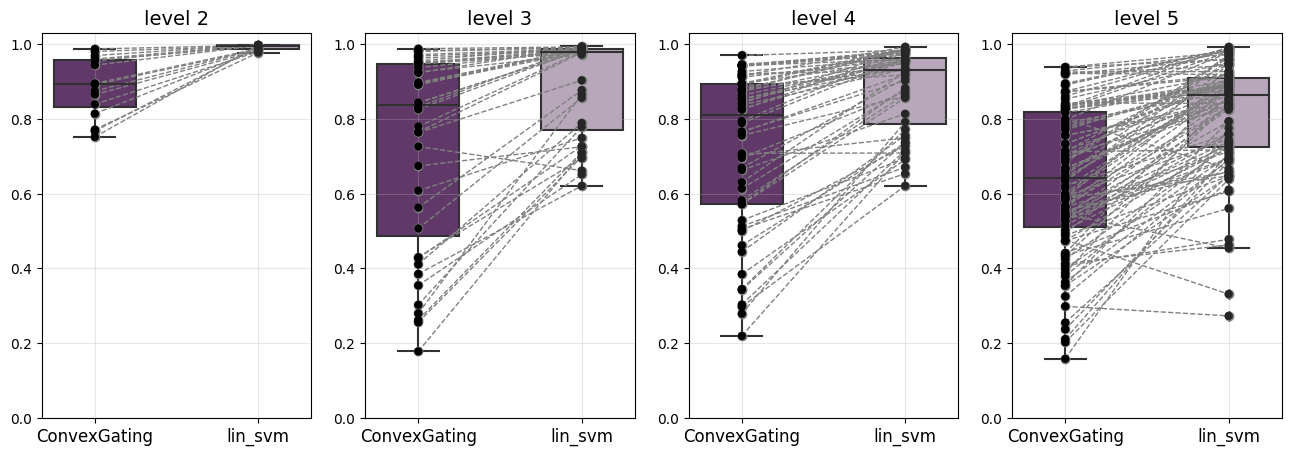

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen f1
sns.boxplot(data=comp_oetjen_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_f1)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_f1['f1_cg'][i], comp_oetjen_lvl2_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_f1)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_f1['f1_cg'][i], comp_oetjen_lvl3_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[2],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_f1)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_f1['f1_cg'][i], comp_oetjen_lvl4_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[3],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_f1)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_f1['f1_cg'][i], comp_oetjen_lvl5_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_oetjen_f1.pdf'),dpi = 300,bbox_inches='tight')

In [18]:
comp_oetjen_lvl2_precision.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl2_precision.csv'))
comp_oetjen_lvl3_precision.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl3_precision.csv'))
comp_oetjen_lvl4_precision.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl4_precision.csv'))
comp_oetjen_lvl5_precision.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl5_precision.csv'))

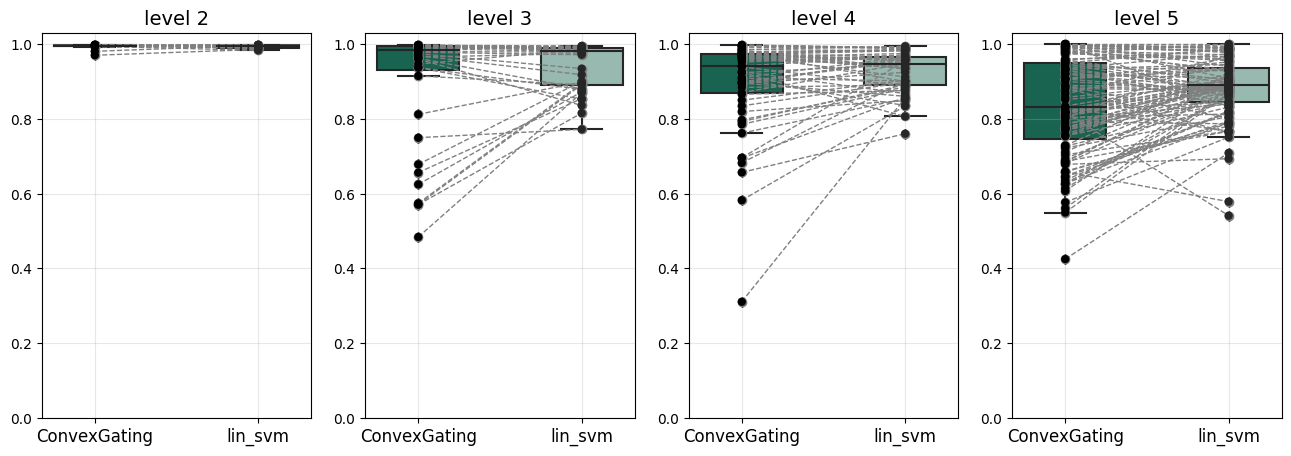

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen precision
sns.boxplot(data=comp_oetjen_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_precision)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_precision['precision_cg'][i], comp_oetjen_lvl2_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_precision)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_precision['precision_cg'][i], comp_oetjen_lvl3_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[2],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_precision)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_precision['precision_cg'][i], comp_oetjen_lvl4_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[3],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_precision)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_precision['precision_cg'][i], comp_oetjen_lvl5_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_oetjen_precision.pdf'),dpi = 300,bbox_inches='tight')

In [20]:
comp_oetjen_lvl2_recall.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl2_recall.csv'))
comp_oetjen_lvl3_recall.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl3_recall.csv'))
comp_oetjen_lvl4_recall.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl4_recall.csv'))
comp_oetjen_lvl5_recall.to_csv(os.path.join(path_output_script,pre + '_comp_oetjen_lin_svm_lvl5_recall.csv'))

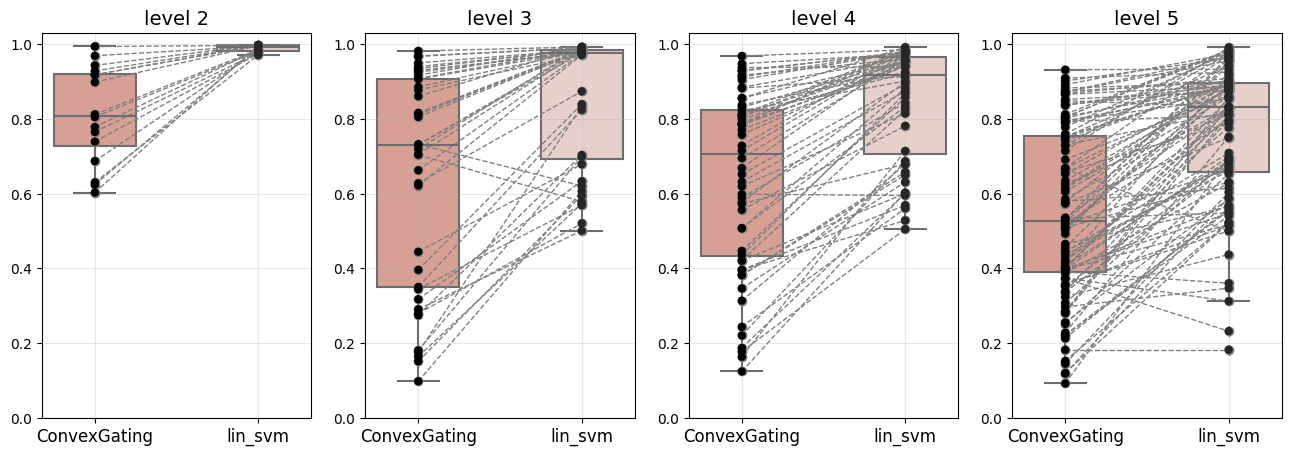

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
#Oetjen recall
sns.boxplot(data=comp_oetjen_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[0])
for i in range(len(comp_oetjen_lvl2_recall)):
    axes[0].plot([0, 1], [comp_oetjen_lvl2_recall['recall_cg'][i], comp_oetjen_lvl2_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 2',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl3_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl3_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[1])
for i in range(len(comp_oetjen_lvl3_recall)):
    axes[1].plot([0, 1], [comp_oetjen_lvl3_recall['recall_cg'][i], comp_oetjen_lvl3_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 3',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl4_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[2],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl4_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[2])
for i in range(len(comp_oetjen_lvl4_recall)):
    axes[2].plot([0, 1], [comp_oetjen_lvl4_recall['recall_cg'][i], comp_oetjen_lvl4_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[2].set_xlabel('Conditions')
axes[2].set_title('level 4',fontsize = 14)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12) 
axes[2].set_ylim([0,1.03])
axes[2].grid(True,alpha = 0.3)

sns.boxplot(data=comp_oetjen_lvl5_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[3],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_oetjen_lvl5_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[3])
for i in range(len(comp_oetjen_lvl5_recall)):
    axes[3].plot([0, 1], [comp_oetjen_lvl5_recall['recall_cg'][i], comp_oetjen_lvl5_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[3].set_xlabel('Conditions')
axes[3].set_title('level 5',fontsize = 14)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=12) 
axes[3].set_ylim([0,1.03])
axes[3].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_oetjen_recall.pdf'),dpi = 300,bbox_inches='tight')

## small monocyte panel

In [36]:
hofer_cg_path_lvl1 = os.path.join(path_input_data,'ConvexGating','performance_summary_Hofer_level1 (1).csv')
hofer_cg_path_lvl2 = os.path.join(path_input_data,'ConvexGating','performance_summary_Hofer_level2 (1).csv')

In [37]:
hofer_cg_lvl1 = pd.read_csv(hofer_cg_path_lvl1,index_col =0)
hofer_cg_lvl2 = pd.read_csv(hofer_cg_path_lvl2,index_col =0)

In [38]:
hofer_cg_lvl1['level'] = 1
add_ID(hofer_cg_lvl1)

hofer_cg_lvl1_processed = make_best_hierarchy_df(hofer_cg_lvl1)

hofer_cg_lvl1_processed_f1 = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'f1']
hofer_cg_lvl1_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
hofer_cg_lvl1_processed_f1['tool'] = 'ConvexGating'

hofer_cg_lvl1_processed_precision = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'precision']
hofer_cg_lvl1_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
hofer_cg_lvl1_processed_precision['tool'] = 'ConvexGating'

hofer_cg_lvl1_processed_recall = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'recall']
hofer_cg_lvl1_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
hofer_cg_lvl1_processed_recall['tool'] = 'ConvexGating'

hofer_cg_lvl1_processed = hofer_cg_lvl1_processed_f1.append(hofer_cg_lvl1_processed_precision).append(hofer_cg_lvl1_processed_recall)

hofer_cg_lvl2['level'] = 2
add_ID(hofer_cg_lvl2)

hofer_cg_lvl2_processed = make_best_hierarchy_df(hofer_cg_lvl2)

hofer_cg_lvl2_processed_f1 = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'f1']
hofer_cg_lvl2_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
hofer_cg_lvl2_processed_f1['tool'] = 'ConvexGating'

hofer_cg_lvl2_processed_precision = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'precision']
hofer_cg_lvl2_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
hofer_cg_lvl2_processed_precision['tool'] = 'ConvexGating'

hofer_cg_lvl2_processed_recall = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'recall']
hofer_cg_lvl2_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
hofer_cg_lvl2_processed_recall['tool'] = 'ConvexGating'

hofer_cg_lvl2_processed = hofer_cg_lvl2_processed_f1.append(hofer_cg_lvl2_processed_precision).append(hofer_cg_lvl2_processed_recall)

In [39]:
hofer_linear_svm_path = os.path.join(path_input_data,'performance_linsvm','svm_linear','Hofer_data')

hofer_linear_svm_sub_lvl1 = pd.read_csv(os.path.join(hofer_linear_svm_path,'mono_merge_annotated_cell_types_linear_svm_sub_overview.csv'),index_col = 0)
hofer_linear_svm_sub_lvl1 = hofer_linear_svm_sub_lvl1[hofer_linear_svm_sub_lvl1['celltype'] != 'not annotated']

hofer_linear_svm_sub_lvl1['cell_type'] = hofer_linear_svm_sub_lvl1['celltype']
hofer_linear_svm_sub_lvl1['level'] = 1
hofer_lin_svm_lvl1 = add_ID(hofer_linear_svm_sub_lvl1)
hofer_lin_svm_lvl1 = hofer_lin_svm_lvl1.rename(columns={'f1': 'f1_lin_svm'})
hofer_lin_svm_lvl1 = hofer_lin_svm_lvl1.rename(columns={'recall': 'recall_lin_svm'})
hofer_lin_svm_lvl1 = hofer_lin_svm_lvl1.rename(columns={'precision': 'precision_lin_svm'})

hofer_linear_svm_sub_lvl2 = pd.read_csv(os.path.join(hofer_linear_svm_path,'mono_merge_annotated_cell_types_lvl2_linear_svm_sub_overview.csv'),index_col = 0)
hofer_linear_svm_sub_lvl2 = hofer_linear_svm_sub_lvl2[hofer_linear_svm_sub_lvl2['celltype'] != 'not annotated']

hofer_linear_svm_sub_lvl2['cell_type'] = hofer_linear_svm_sub_lvl2['celltype']
hofer_linear_svm_sub_lvl2['level'] = 2
hofer_lin_svm_lvl2 = add_ID(hofer_linear_svm_sub_lvl2)
hofer_lin_svm_lvl2 = hofer_lin_svm_lvl2.rename(columns={'f1': 'f1_lin_svm'})
hofer_lin_svm_lvl2 = hofer_lin_svm_lvl2.rename(columns={'recall': 'recall_lin_svm'})
hofer_lin_svm_lvl2 = hofer_lin_svm_lvl2.rename(columns={'precision': 'precision_lin_svm'})

In [40]:
# Visualize

In [41]:
comp_hofer_lvl1_f1 = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'f1'].merge(hofer_lin_svm_lvl1, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_hofer_lvl2_f1 = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'f1'].merge(hofer_lin_svm_lvl2, on = 'ID')[['f1_lin_svm','f1_cg']]

comp_hofer_lvl1_precision = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'precision'].merge(hofer_lin_svm_lvl1, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_hofer_lvl2_precision = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'precision'].merge(hofer_lin_svm_lvl2, on = 'ID')[['precision_lin_svm','precision_cg']]

comp_hofer_lvl1_recall = hofer_cg_lvl1_processed[hofer_cg_lvl1_processed['score'] == 'recall'].merge(hofer_lin_svm_lvl1, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_hofer_lvl2_recall = hofer_cg_lvl2_processed[hofer_cg_lvl2_processed['score'] == 'recall'].merge(hofer_lin_svm_lvl2, on = 'ID')[['recall_lin_svm','recall_cg']]

In [43]:
#save
comp_hofer_lvl1_f1.to_csv(os.path.join(path_output_script,pre + '_comp_hofer_lin_svm_lvl1_f1.csv'))
comp_hofer_lvl2_f1.to_csv(os.path.join(path_output_script,pre + '_comp_hofer_lin_svm_lvl2_f1.csv'))

comp_hofer_lvl1_precision.to_csv(os.path.join(path_output_script,pre + '_comp_hofer_lin_svm_lvl1_precision.csv'))
comp_hofer_lvl2_precision.to_csv(os.path.join(path_output_script,pre + '_comp_hofer_lin_svm_lvl2_precision.csv'))

comp_hofer_lvl1_recall.to_csv(os.path.join(path_output_script,pre + '_comp_hofer_lin_svm_lvl1_recall.csv'))
comp_hofer_lvl2_recall.to_csv(os.path.join(path_output_script,pre + '_comp_hofer_lin_svm_lvl2_recall.csv'))

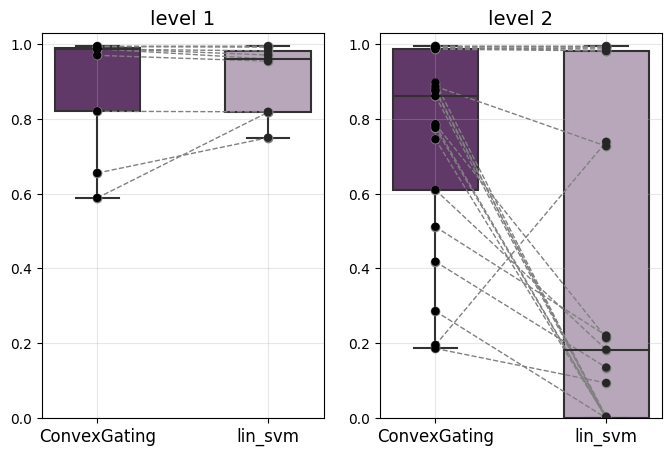

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer f1
sns.boxplot(data=comp_hofer_lvl1_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_f1)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_f1['f1_cg'][i], comp_hofer_lvl1_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_f1)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_f1['f1_cg'][i], comp_hofer_lvl2_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_hofer_f1.pdf'),dpi = 300,bbox_inches='tight')

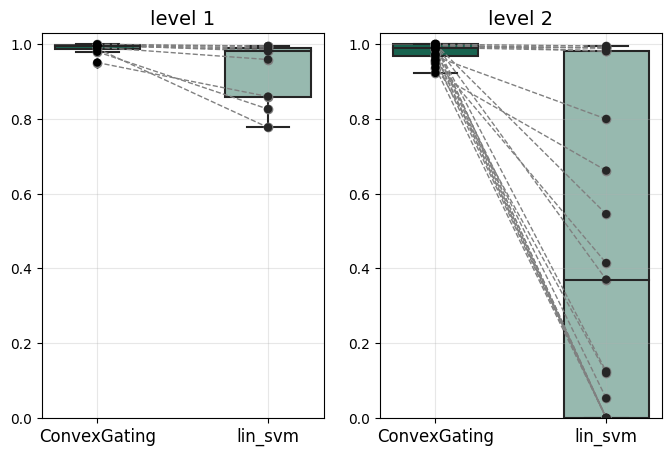

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer precision
sns.boxplot(data=comp_hofer_lvl1_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_precision)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_precision['precision_cg'][i], comp_hofer_lvl1_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_precision)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_precision['precision_cg'][i], comp_hofer_lvl2_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_hofer_precision.pdf'),dpi = 300,bbox_inches='tight')

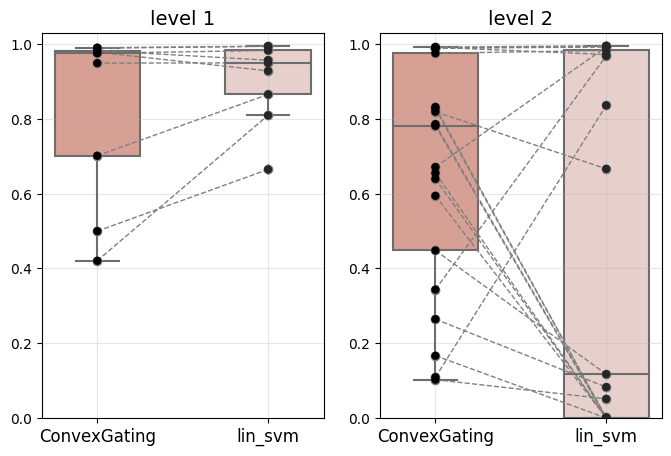

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#hofer recall
sns.boxplot(data=comp_hofer_lvl1_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl1_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[0])
for i in range(len(comp_hofer_lvl1_recall)):
    axes[0].plot([0, 1], [comp_hofer_lvl1_recall['recall_cg'][i], comp_hofer_lvl1_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_hofer_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_hofer_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[1])
for i in range(len(comp_hofer_lvl2_recall)):
    axes[1].plot([0, 1], [comp_hofer_lvl2_recall['recall_cg'][i], comp_hofer_lvl2_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_hofer_recall.pdf'),dpi = 300,bbox_inches='tight')

## large PBMC panel

In [48]:
HIV_cg_path_lvl1 = os.path.join(path_input_data,'ConvexGating','performance_summary_HIV_level1.csv')
HIV_cg_path_lvl2 = os.path.join(path_input_data,'ConvexGating','performance_summary_HIV_level2.csv')

In [49]:
columns_order = ['hierarchy_1', 'hierarchy_2', 'hierarchy_3', 'hierarchy_4', 'hierarchy_5', 'score', 'cell_type','sample']
HIV_cg_lvl1 = pd.read_csv(HIV_cg_path_lvl1,index_col =0)
HIV_cg_lvl2 = pd.read_csv(HIV_cg_path_lvl2,index_col =0)
HIV_cg_lvl1 = HIV_cg_lvl1[columns_order]
HIV_cg_lvl2 = HIV_cg_lvl2[columns_order]

In [50]:
HIV_cg_lvl1['level'] = 1
add_ID(HIV_cg_lvl1)

HIV_cg_lvl1_processed = make_best_hierarchy_df(HIV_cg_lvl1)

HIV_cg_lvl1_processed_f1 = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'f1']
HIV_cg_lvl1_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
HIV_cg_lvl1_processed_f1['tool'] = 'ConvexGating'

HIV_cg_lvl1_processed_precision = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'precision']
HIV_cg_lvl1_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
HIV_cg_lvl1_processed_precision['tool'] = 'ConvexGating'

HIV_cg_lvl1_processed_recall = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'recall']
HIV_cg_lvl1_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
HIV_cg_lvl1_processed_recall['tool'] = 'ConvexGating'

HIV_cg_lvl1_processed = HIV_cg_lvl1_processed_f1.append(HIV_cg_lvl1_processed_precision).append(HIV_cg_lvl1_processed_recall)

In [51]:
HIV_cg_lvl2['level'] = 2
add_ID(HIV_cg_lvl2)

HIV_cg_lvl2_processed = make_best_hierarchy_df(HIV_cg_lvl2)

HIV_cg_lvl2_processed_f1 = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'f1']
HIV_cg_lvl2_processed_f1.rename(columns={'best_hierarchy': 'f1_cg'}, inplace=True)
HIV_cg_lvl2_processed_f1['tool'] = 'ConvexGating'

HIV_cg_lvl2_processed_precision = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'precision']
HIV_cg_lvl2_processed_precision.rename(columns={'best_hierarchy': 'precision_cg'}, inplace=True)
HIV_cg_lvl2_processed_precision['tool'] = 'ConvexGating'

HIV_cg_lvl2_processed_recall = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'recall']
HIV_cg_lvl2_processed_recall.rename(columns={'best_hierarchy': 'recall_cg'}, inplace=True)
HIV_cg_lvl2_processed_recall['tool'] = 'ConvexGating'

HIV_cg_lvl2_processed = HIV_cg_lvl2_processed_f1.append(HIV_cg_lvl2_processed_precision).append(HIV_cg_lvl2_processed_recall)

### Linear SVM

In [53]:
HIV_linear_svm_path = os.path.join(path_input_data,'performance_linsvm','svm_linear','HIV_data')

HIV_linear_svm_sub_lvl1 = pd.read_csv(os.path.join(HIV_linear_svm_path,'HIV_data_annotated_cell_type_lvl_1_sub_linear_svm_overview.csv'),index_col = 0)
HIV_linear_svm_sub_lvl1 = HIV_linear_svm_sub_lvl1[HIV_linear_svm_sub_lvl1['celltype'] != 'not annotated']

HIV_linear_svm_sub_lvl1['cell_type'] = HIV_linear_svm_sub_lvl1['celltype']
HIV_linear_svm_sub_lvl1['level'] = 1
HIV_lin_svm_lvl1 = add_ID(HIV_linear_svm_sub_lvl1)
HIV_lin_svm_lvl1 = HIV_lin_svm_lvl1.rename(columns={'f1': 'f1_lin_svm'})
HIV_lin_svm_lvl1 = HIV_lin_svm_lvl1.rename(columns={'recall': 'recall_lin_svm'})
HIV_lin_svm_lvl1 = HIV_lin_svm_lvl1.rename(columns={'precision': 'precision_lin_svm'})

HIV_linear_svm_sub_lvl2 = pd.read_csv(os.path.join(HIV_linear_svm_path,'HIV_data_annotated_cell_type_lvl_2_sub_linear_svm_overview.csv'),index_col = 0)
HIV_linear_svm_sub_lvl2 = HIV_linear_svm_sub_lvl2[HIV_linear_svm_sub_lvl2['celltype'] != 'not annotated']

HIV_linear_svm_sub_lvl2['cell_type'] = HIV_linear_svm_sub_lvl2['celltype']
HIV_linear_svm_sub_lvl2['level'] = 2
HIV_lin_svm_lvl2 = add_ID(HIV_linear_svm_sub_lvl2)
HIV_lin_svm_lvl2 = HIV_lin_svm_lvl2.rename(columns={'f1': 'f1_lin_svm'})
HIV_lin_svm_lvl2 = HIV_lin_svm_lvl2.rename(columns={'recall': 'recall_lin_svm'})
HIV_lin_svm_lvl2 = HIV_lin_svm_lvl2.rename(columns={'precision': 'precision_lin_svm'})

In [54]:
comp_HIV_lvl1_f1 = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'f1'].merge(HIV_lin_svm_lvl1, on = 'ID')[['f1_lin_svm','f1_cg']]
comp_HIV_lvl2_f1 = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'f1'].merge(HIV_lin_svm_lvl2, on = 'ID')[['f1_lin_svm','f1_cg']]

comp_HIV_lvl1_precision = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'precision'].merge(HIV_lin_svm_lvl1, on = 'ID')[['precision_lin_svm','precision_cg']]
comp_HIV_lvl2_precision = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'precision'].merge(HIV_lin_svm_lvl2, on = 'ID')[['precision_lin_svm','precision_cg']]

comp_HIV_lvl1_recall = HIV_cg_lvl1_processed[HIV_cg_lvl1_processed['score'] == 'recall'].merge(HIV_lin_svm_lvl1, on = 'ID')[['recall_lin_svm','recall_cg']]
comp_HIV_lvl2_recall = HIV_cg_lvl2_processed[HIV_cg_lvl2_processed['score'] == 'recall'].merge(HIV_lin_svm_lvl2, on = 'ID')[['recall_lin_svm','recall_cg']]

In [55]:
#save
comp_HIV_lvl1_f1.to_csv(os.path.join(path_output_script,pre + '_comp_HIV_lin_svm_lvl1_f1.csv'))
comp_HIV_lvl2_f1.to_csv(os.path.join(path_output_script,pre + '_comp_HIV_lin_svm_lvl2_f1.csv'))

comp_HIV_lvl1_precision.to_csv(os.path.join(path_output_script,pre + '_comp_HIV_lin_svm_lvl1_precision.csv'))
comp_HIV_lvl2_precision.to_csv(os.path.join(path_output_script,pre + '_comp_HIV_lin_svm_lvl2_precision.csv'))

comp_HIV_lvl1_recall.to_csv(os.path.join(path_output_script,pre + '_comp_HIV_lin_svm_lvl1_recall.csv'))
comp_HIV_lvl2_recall.to_csv(os.path.join(path_output_script,pre + '_comp_HIV_lin_svm_lvl2_recall.csv'))

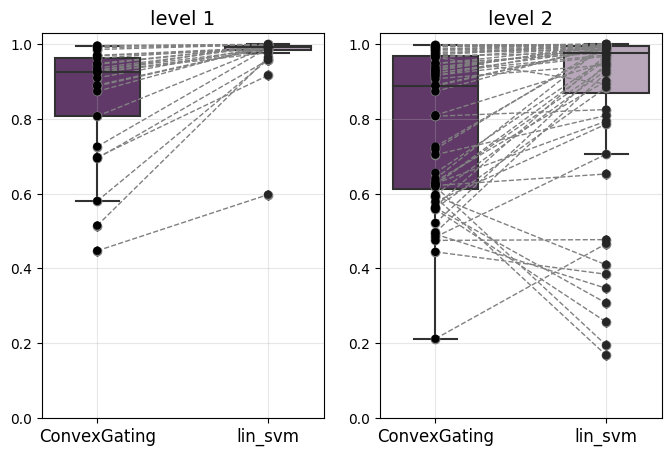

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV f1
sns.boxplot(data=comp_HIV_lvl1_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_f1)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_f1['f1_cg'][i], comp_HIV_lvl1_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_f1.rename(columns={'f1_cg': 'ConvexGating', 'f1_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#663171',sns.light_palette('#663171', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_f1, color='black', size=6, jitter=False,order = ['f1_cg','f1_lin_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_f1)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_f1['f1_cg'][i], comp_HIV_lvl2_f1['f1_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_HIV_f1.pdf'),dpi = 300,bbox_inches='tight')

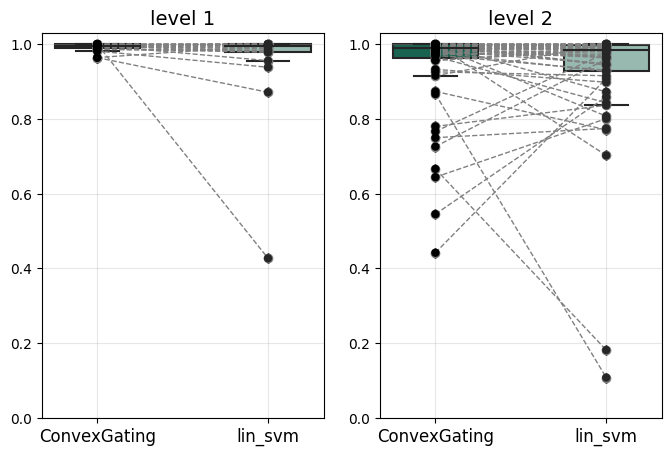

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV precision
sns.boxplot(data=comp_HIV_lvl1_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_precision)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_precision['precision_cg'][i], comp_HIV_lvl1_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_precision.rename(columns={'precision_cg': 'ConvexGating', 'precision_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#0c7156',sns.light_palette('#0c7156', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_precision, color='black', size=6, jitter=False,order = ['precision_cg','precision_lin_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_precision)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_precision['precision_cg'][i], comp_HIV_lvl2_precision['precision_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_HIV_precision.pdf'),dpi = 300,bbox_inches='tight')

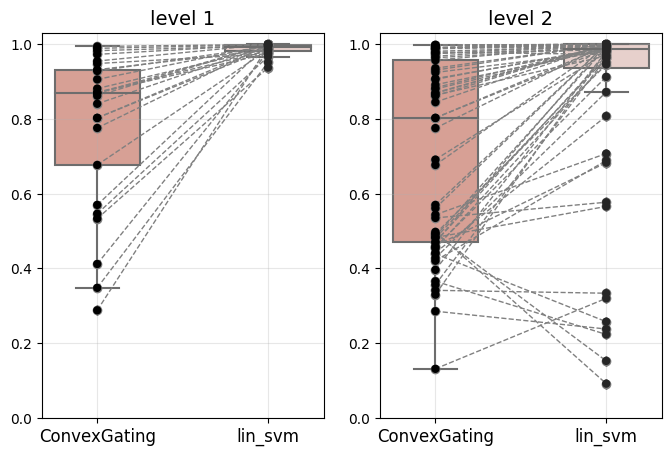

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
#HIV recall
sns.boxplot(data=comp_HIV_lvl1_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[0],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl1_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[0])
for i in range(len(comp_HIV_lvl1_recall)):
    axes[0].plot([0, 1], [comp_HIV_lvl1_recall['recall_cg'][i], comp_HIV_lvl1_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[0].set_xlabel('Conditions')
axes[0].set_title('level 1',fontsize = 14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12) 
axes[0].set_ylim([0,1.03])
axes[0].grid(True,alpha = 0.3)

sns.boxplot(data=comp_HIV_lvl2_recall.rename(columns={'recall_cg': 'ConvexGating', 'recall_lin_svm': 'lin_svm'}),order = ['ConvexGating','lin_svm'],width=0.5,ax = axes[1],palette = ['#e2998a',sns.light_palette('#e2998a', as_cmap=False)[2]])
sns.stripplot(data=comp_HIV_lvl2_recall, color='black', size=6, jitter=False,order = ['recall_cg','recall_lin_svm'],ax = axes[1])
for i in range(len(comp_HIV_lvl2_recall)):
    axes[1].plot([0, 1], [comp_HIV_lvl2_recall['recall_cg'][i], comp_HIV_lvl2_recall['recall_lin_svm'][i]], '--o', color='grey', linewidth=1)
#axes[1].set_xlabel('Conditions')
axes[1].set_title('level 2',fontsize = 14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12) 
axes[1].set_ylim([0,1.03])
axes[1].grid(True,alpha = 0.3)
plt.savefig(os.path.join(path_output_script,pre + '_cg_lin_svm_HIV_recall.pdf'),dpi = 300,bbox_inches='tight')

In [59]:
columns = ['tool','panel','level','mean f1','mean precision','mean recall']

lin_svm_overview = pd.DataFrame(columns = ['tool','panel','level','mean f1','mean precision','mean recall'])

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','hofer','level 1',np.round(np.mean(comp_hofer_lvl1_f1['f1_lin_svm']),3),np.round(np.mean(comp_hofer_lvl1_precision['precision_lin_svm']),3),np.round(np.mean(comp_hofer_lvl1_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview =  lin_svm_overview.append(pd.DataFrame(['linear svm','hofer','level 2',np.round(np.mean(comp_hofer_lvl2_f1['f1_lin_svm']),3),np.round(np.mean(comp_hofer_lvl2_precision['precision_lin_svm']),3),np.round(np.mean(comp_hofer_lvl2_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','HIV','level 1',np.round(np.mean(comp_HIV_lvl1_f1['f1_lin_svm']),3),np.round(np.mean(comp_HIV_lvl1_precision['precision_lin_svm']),3),np.round(np.mean(comp_HIV_lvl1_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview =  lin_svm_overview.append(pd.DataFrame(['linear svm','HIV','level 2',np.round(np.mean(comp_HIV_lvl2_f1['f1_lin_svm']),3),np.round(np.mean(comp_HIV_lvl2_precision['precision_lin_svm']),3),np.round(np.mean(comp_HIV_lvl2_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 2',np.round(np.mean(comp_oetjen_lvl2_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl2_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl2_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 3',np.round(np.mean(comp_oetjen_lvl3_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl3_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl3_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 4',np.round(np.mean(comp_oetjen_lvl4_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl4_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl4_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview = lin_svm_overview.append(pd.DataFrame(['linear svm','oetjen','level 5',np.round(np.mean(comp_oetjen_lvl5_f1['f1_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl5_precision['precision_lin_svm']),3),np.round(np.mean(comp_oetjen_lvl5_recall['recall_lin_svm']),3)],index = columns).T)

lin_svm_overview['panel'] = lin_svm_overview['panel'].replace('hofer', 'monocyte panel')

lin_svm_overview['panel'] = lin_svm_overview['panel'].replace('HIV', 'PBMC panel')

lin_svm_overview['panel'] = lin_svm_overview['panel'].replace('oetjen', 'cyTOF panel')
lin_svm_overview.to_csv(os.path.join(path_output_script,pre + '_lin_svm_mean_performance.csv'))
